In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

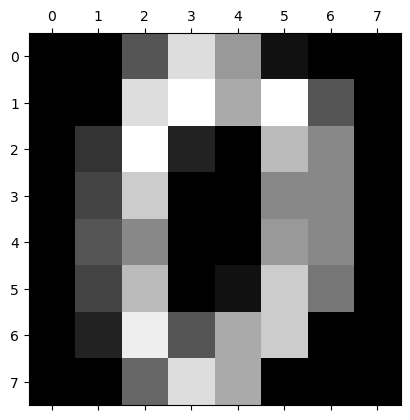

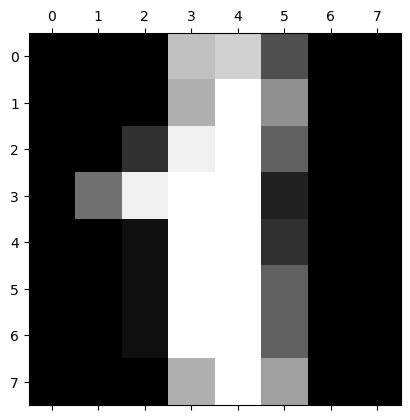

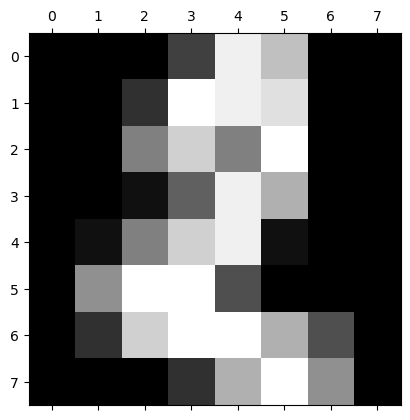

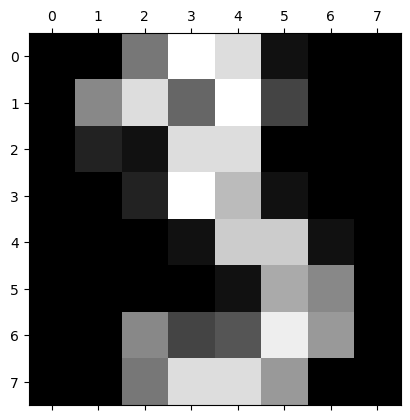

In [4]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [5]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
df['target'] = digits.target

In [7]:
X = df.drop('target', axis = 1)
y = df.target

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                   test_size=0.3,
                                                   random_state = 101)

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [10]:
model.score(X_test, y_test)

0.9703703703703703

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8462962962962963

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9611111111111111

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=60)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.975925925925926

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = model.predict(X_test)

In [17]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.93      0.98      0.96        55
           2       1.00      1.00      1.00        49
           3       1.00      0.96      0.98        54
           4       0.98      0.97      0.98        61
           5       0.98      0.98      0.98        59
           6       1.00      0.96      0.98        46
           7       0.97      1.00      0.98        56
           8       0.96      0.93      0.95        59
           9       0.96      1.00      0.98        48

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

[[52  0  0  0  1  0  0  0  0  0]
 [ 0 54  0  0  0  1  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 1  0  0 52  0  0  0  1  0  0]
 [ 0  0  0  0 59  0  0  1  1  0]
 [ 0  0  0  0  0 58  0  0  0  1]
 [ 0  1  0  0  0  0 44  0  1  0]
 [ 0  0  0

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=60)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Text(70.72222222222221, 0.5, 'Truth')

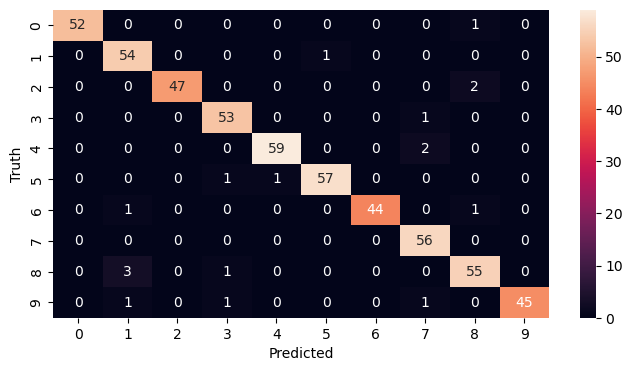

In [20]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')